In [73]:
from PIL import Image
import numpy as np
import torchvision.transforms.functional as F

In [143]:
img = Image.open("../input/images/dogs/collie-beach-bokeh.jpg").convert("RGB")

In [144]:
img = np.array(img)

In [145]:
img.shape  # H,W,C

(667, 1000, 3)

In [155]:
class ZeroPadding:

    def __init__(self, expacted) -> None:
        self.expacted = expacted
        pass

    def __call__(self, img):
        h,w = img.shape[1:]

        h_pad = self.expacted - h
        if h_pad < 0: h_pad = 0

        w_pad = self.expacted - w
        if w_pad < 0: w_pad = 0

        if w_pad == 0 and h_pad == 0:
            return img

        img = F.pad(img, [w_pad, h_pad])

        return img

In [156]:
from torchvision import transforms

In [160]:
compose = transforms.Compose([
    transforms.ToTensor(),  # HWC -> CHW
    ZeroPadding(256),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToPILImage()
])

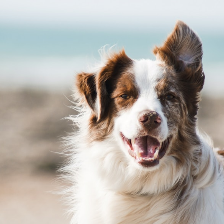

In [161]:
compose(img)

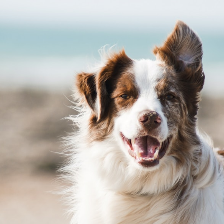

In [162]:
compose(img)